# BIKE RENTING

In [1]:
#Load libraries
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange, uniform
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Changing the directoy
os.chdir("F:\Ed_project_py")

os.getcwd()

'F:\\Ed_project_py'

In [3]:
#Loading the csv
br = pd.read_csv("day.csv")

In [4]:
br.info()
br.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


# Univariate Analysis

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

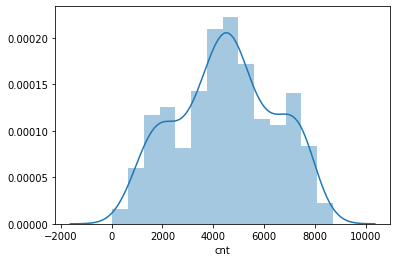

In [5]:
#Check whether target variable is normal or not
sns.distplot(br['cnt']);

#descriptive statistics summary
br['cnt'].describe()

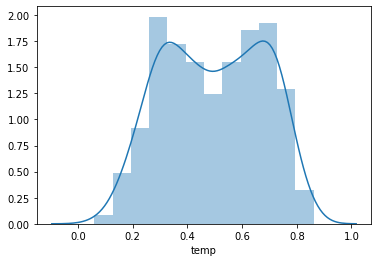

In [6]:
#Distribution of independent numeric variables

#Check whether variable 'temp'is normal or not
sns.distplot(br['temp']);

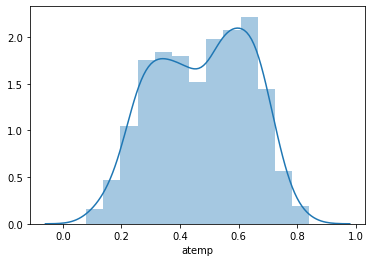

In [7]:
#Check whether variable 'atemp'is normal or not
sns.distplot(br['atemp']);

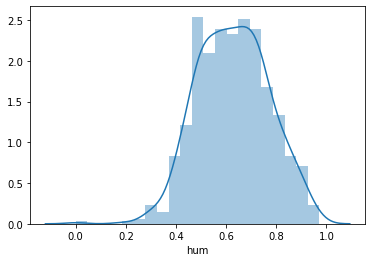

In [8]:
#Check whether variable 'hum'is normal or not
sns.distplot(br['hum']);

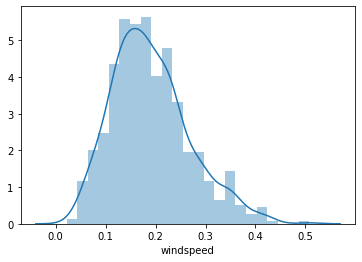

In [9]:
#Check whether variable 'windspeed'is normal or not
sns.distplot(br['windspeed']);

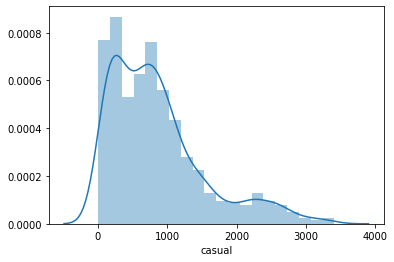

In [10]:
#Check whether variable 'casual'is normal or not
sns.distplot(br['casual']);

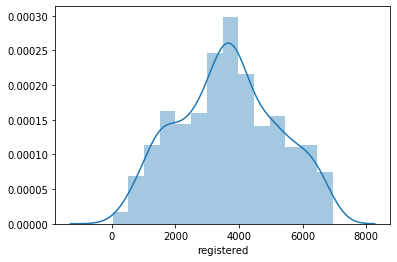

In [11]:
#Check whether variable 'registered'is normal or not
sns.distplot(br['registered']);

# it is clearly showing that chances of outliers present in 'casual' varible

In [12]:
#Numeric variable summary
cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered','cnt']
br[cols].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


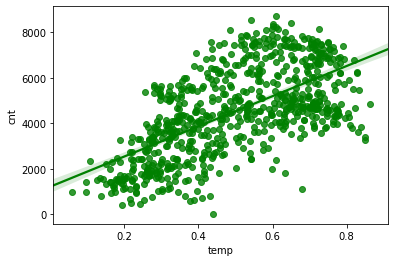

In [13]:
######################################### Bivariate Relationship #####################################################

#relation between Numerical Variable 'temp' and target variable 'cnt'
sns.regplot(x="temp", y="cnt", data=br,marker='o', color='g')
# It is showing there is good relation between 'temp' and 'cnt'


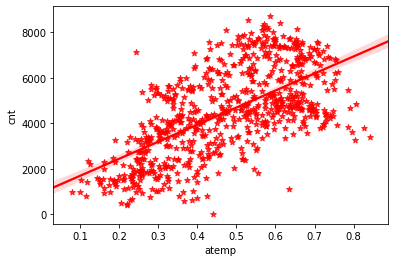

In [14]:

#relation between Numerical Variable 'atemp' and target variable 'cnt'
sns.regplot(x="atemp", y="cnt", data=br,marker='*', color='r')
# It is showing there is good relation between 'atemp' and 'cnt'


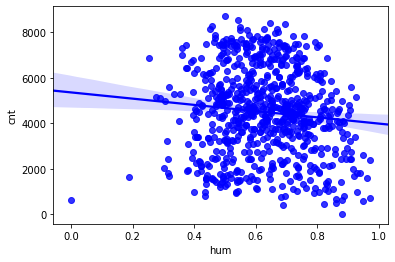

In [15]:
#relation between Numerical Variable 'hum' and target variable 'cnt'
sns.regplot(x="hum", y="cnt", data=br,marker='o', color='blue')

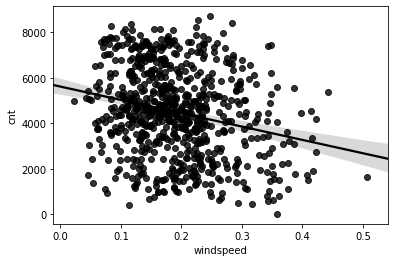

In [16]:
#relation between Numerical Variable 'windspeed' and target variable'cnt'
sns.regplot(x="windspeed", y="cnt", data=br,marker='o', color='black')
# It is showing there is negative relation between 'windspeed' and'cnt'

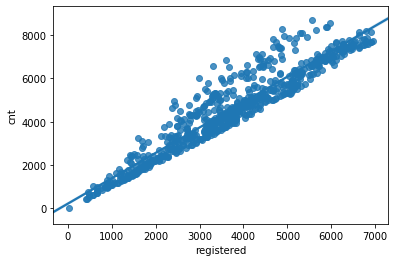

In [17]:
#relation between variables 'registered' and 'cnt'
sns.regplot(x="registered", y="cnt", data=br)

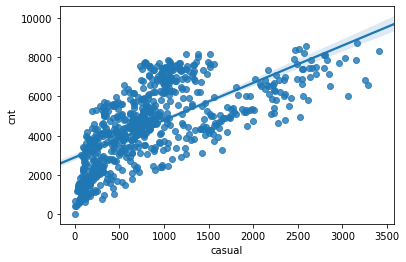

In [18]:
#relation between variables 'casual' and 'cnt'
sns.regplot(x="casual", y="cnt", data=br)

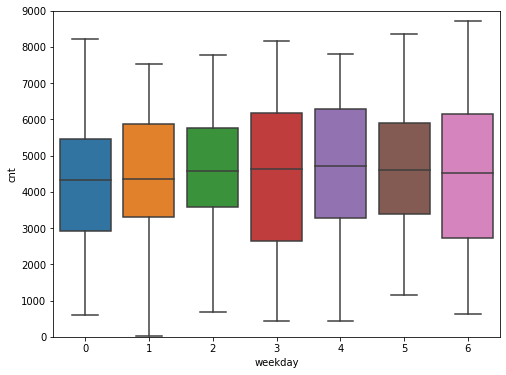

In [19]:
#box plot 'weekdays' with 'CNT'
var_weekdays = 'weekday'
data = pd.concat([br['cnt'], br[var_weekdays]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_weekdays, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);
#below Boxplot is saying that median high on holidays when compare to weekdays

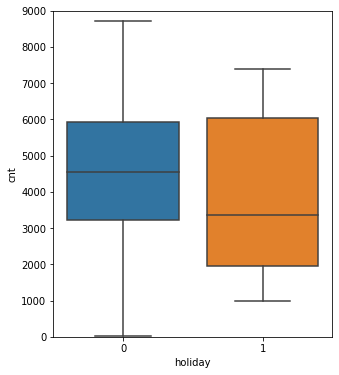

In [20]:
#box plot 'holiday'with 'CNT'
var_holiday = 'holiday'
data = pd.concat([br['cnt'], br[var_holiday]], axis=1)
f, ax = plt.subplots(figsize=(5, 6))
fig = sns.boxplot(x=var_holiday, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);
#below Boxplot is saying that median high on holidays when compare to weekdays

C:\Users\Gravity\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


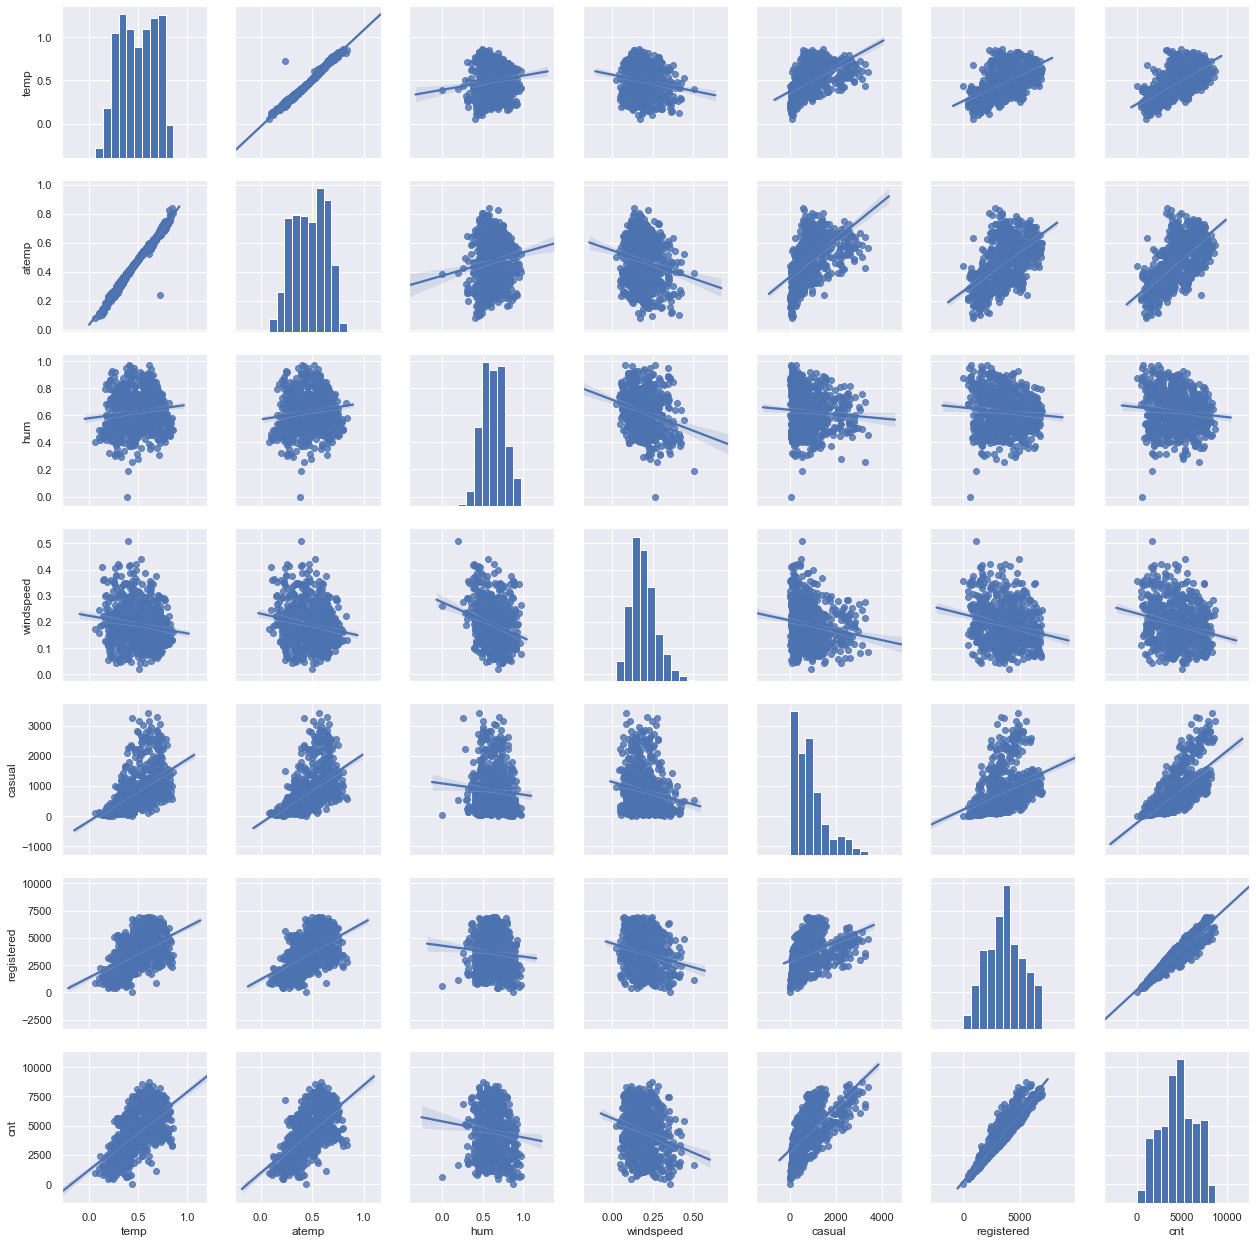

In [21]:
# check relationship with scatter plots
sns.set()
cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered','cnt']

sns.pairplot(br[cols], size = 2.5,kind="reg")
plt.show();
#As per scatter plots and above Correlation graph there is strong relation between Independent variable 'temp' and 'atemp'
# so dropping one of two variables for feature selection is necessary

In [22]:
print("Skewness: %f" % br['cnt'].skew())
print("Kurtosis: %f" % br['cnt'].kurt())
#Here Skewness is very less so target variable is normal distribution

Skewness: -0.047353
Kurtosis: -0.811922


# Exploratory Data Analysis[EDA]

In [23]:
#Exploratory Data Analysis[EDA]
br = br.drop('instant', axis=1)
br['season']= br['season'].astype('category')
br['yr']=br['yr'].astype('int')
br['mnth']=br['mnth'].astype('category')
br['holiday']=br['holiday'].astype('int')
br['weekday']=br['weekday'].astype('category')
br['workingday']=br['workingday'].astype('int')
br['weathersit']=br['weathersit'].astype('category')

d1=br['dteday'].copy()
for i in range (0,d1.shape[0]):
 d1[i]=datetime.datetime.strptime(d1[i], '%Y-%m-%d').strftime('%d')

br['dteday']=d1
br['dteday']=br['dteday'].astype('category')
#br = br.drop(['instant','casual', 'registered'], axis=1)

In [24]:
br.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [25]:
br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
dteday        731 non-null category
season        731 non-null category
yr            731 non-null int32
mnth          731 non-null category
holiday       731 non-null int32
weekday       731 non-null category
workingday    731 non-null int32
weathersit    731 non-null category
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: category(5), float64(4), int32(3), int64(3)
memory usage: 54.7 KB


# Missing Values

In [26]:
#Calculating the null values in the dataframe
missing_value = pd.DataFrame(br.isnull().sum())
missing_value.reset_index()
missing_value = missing_value.rename(columns = {'index': 'Variables', 0: 'Missing_Val'})
missing_value
##There is no missing value in the data

,Missing_Val
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0


#  Outlier Analysis

In [27]:
# Already all numeric variable are in normalize form.
# temp,atem,hum,windspread are in normalize form no need for outlier treatment

In [28]:
backup=br.copy()

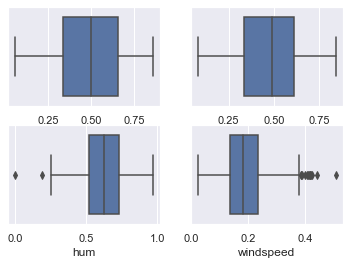

In [29]:
#saving numeric values#
cnames=["temp","atemp","hum","windspeed","casual","registered","cnt"]
#ploting boxplotto visualize outliers#
plt.subplot(2,2,1) 
sns.boxplot(x=br["temp"],orient ='h')
plt.subplot(2,2,2) 
sns.boxplot(x=br["atemp"],orient ='h')
plt.subplot(2,2,3) 
sns.boxplot(x=br["hum"],orient ='h')
plt.subplot(2,2,4)
sns.boxplot(x=br["windspeed"],orient ='h')

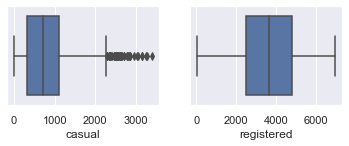

In [30]:
plt.subplot(2,2,1)
sns.boxplot(x=br["casual"],orient ='h')
plt.subplot(2,2,2)
sns.boxplot(x=br["registered"],orient ='h')

In [31]:
#"hum","windspeed","casual" shows outliers, but data is normalized, no need for outlier treatment.

# Feature Selection

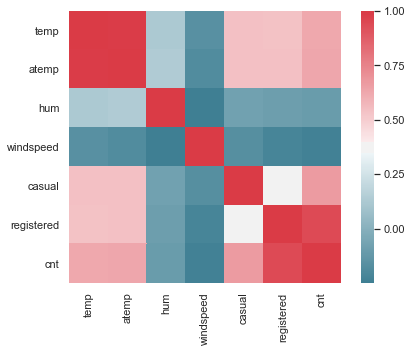

In [32]:
df_corr = br[cnames]

#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

In [33]:
corr

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
cnt,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


In [34]:
br['atemp'].corr(br['cnt'])

0.6310656998491813

In [35]:
#droping corelated variable
br = br.drop(['atemp','casual','registered'], axis=1)

In [36]:
br.shape

(731, 12)

# Model Development

In [37]:
#dividing data into train and test
train, test = train_test_split(br, test_size=0.2)

In [38]:
###############Decision tree########################

In [39]:
#Decision tree for regression
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:11],train.iloc[:,11])
predictions_DT = fit_DT.predict(test.iloc[:,0:11])

In [40]:
#################random forest###############################

In [41]:
#random forest
RFmodel = RandomForestRegressor(n_estimators = 200).fit(train.iloc[:,0:11], train.iloc[:,11])
RF_Predictions = RFmodel.predict(test.iloc[:,0:11])

In [42]:
################linear regression##############################

In [43]:
#linear regression

#creating dummy variable
data_lr=br.copy()
cat_names = ["season", "dteday", "weathersit", "mnth","weekday"]

for i in cat_names:
  temp = pd.get_dummies(data_lr[i], prefix = i)
  data_lr = data_lr.join(temp)


In [44]:
fields_to_drop = ['dteday', 'season', 'weathersit', 'weekday', 'mnth','cnt']

data_lr = data_lr.drop(fields_to_drop, axis=1)
data_lr=data_lr.join(br['cnt'])

In [45]:
#Divide data into train and test
#trainlr, testlr = train_test_split(data_lr, test_size=0.2)

#train data
index_train=train.index.values
trainlr=data_lr.iloc[index_train,:]
#test data
index_test=test.index.values
testlr=data_lr.iloc[index_test,:]

In [46]:
# Train the model using the training sets
model = sm.OLS(trainlr.iloc[:,63], trainlr.iloc[:,0:63]).fit()

In [47]:
# make the predictions by the model
predictions_LR = model.predict(testlr.iloc[:,0:63])

In [48]:
#lr model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     52.22
Date:                Sat, 06 Jul 2019   Prob (F-statistic):          8.54e-181
Time:                        11:35:36   Log-Likelihood:                -4691.5
No. Observations:                 584   AIC:                             9499.
Df Residuals:                     526   BIC:                             9753.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
yr            1992.9931     67.196     29.660      0.000    1860.988    2124.998
holiday        -15.9418    180.169     -0.088      0.930    -369.882     337.998
workingday     658.9617     96.578      6.823      0.000     469.236     848.688
temp          4768.3127    473.339     10.074      0.000    3838.445    5698.180
hum          -1500.0700    361.657     -4.148      0.000   -2210.540    -789.600
windspeed    -3038.8605    490.466     -6.196      0.000   -4002.374   -2075.347
season_1      -349.4184    154.677     -2.259      0.024    -653.279     -45.558
season_2       490.3991    162.873      3.011      0.003     170.438     810.360
season_3       523.0991    172.870      3.026      0.003     183.498     862.700
season_4      1303.4872    161.071      8.093      0.000     987.067    1619.908
dteday_01     -208.1326    174.779     -1.191      0.234    -551.484     135.219
dteday_02      141.4615    179.564      0.788      0.431    -211.289     494.212
dteday_03      130.1017    174.070      0.747      0.455    -211.855     472.059
dteday_04      231.3256    179.071      1.292      0.197    -120.456     583.107
dteday_05      151.1777    188.732      0.801      0.423    -219.583     521.938
dteday_06      157.5150    170.753      0.922      0.357    -177.926     492.956
dteday_07      -26.4519    184.131     -0.144      0.886    -388.175     335.271
dteday_08      -27.6361    179.204     -0.154      0.877    -379.680     324.408
dteday_09      -28.1839    178.781     -0.158      0.875    -379.396     323.028
dteday_10      154.2873    174.079      0.886      0.376    -187.689     496.263
dteday_11      299.3184    169.687      1.764      0.078     -34.029     632.666
dteday_12      112.7740    166.923      0.676      0.500    -215.143     440.691
dteday_13      163.2250    196.127      0.832      0.406    -222.063     548.513
dteday_14       43.9056    184.363      0.238      0.812    -318.273     406.084
dteday_15      253.5067    170.268      1.489      0.137     -80.983     587.996
dteday_16      298.3108    180.070      1.657      0.098     -55.434     652.056
dteday_17      363.9389    184.432      1.973      0.049       1.625     726.253
dteday_18       71.6285    171.947      0.417      0.677    -266.158     409.415
dteday_19       77.8484    178.774      0.435      0.663    -273.351     429.047
dteday_20      217.6436    170.169      1.279      0.201    -116.650     551.937
dteday_21      214.2774    173.212      1.237      0.217    -125.994     554.549
dteday_22      -97.1395    191.302     -0.508      0.612    -472.948     278.669
dteday_23      -50.8509    171.542     -0.296      0.767    -387.842     286.140
dteday_24     -209.0336    175.334     -1.192      0.234    -553.475     135.408
dteday_25     -112.4563    184.114     -0.611      0.542    -474.144     249.232
dteda

In [49]:
######Model Evaluation##############

In [50]:
#defining MAPE function
def MAPE(y_true, y_pred):
 mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
 return mape

In [51]:
#MAPE
print('MAPE:')
#MAPE for decision tree regression
DT_M=MAPE(test.iloc[:,11], predictions_DT)
print('For DT:', round(DT_M, 2), '%.')
#MAPE for random forest regression
RF_M=MAPE(test.iloc[:,11],RF_Predictions)
print('For RF:', round(RF_M, 2), '%.')
#MAPE for linear regression
LR_M=MAPE(testlr.iloc[:,63], predictions_LR)
print('For LR:', round(LR_M, 2), '%.')

MAPE:
For DT: 30.7 %.
For RF: 17.85 %.
For LR: 17.66 %.


In [52]:
# Calculate and display Accuracy
print('Accuracy:')
print('For DT:', round(100-DT_M, 2), '%.')
print('For RF:', round(100-RF_M, 2), '%.')
print('For LR:', round(100-LR_M, 2), '%.')

Accuracy:
For DT: 69.3 %.
For RF: 82.15 %.
For LR: 82.34 %.


In [53]:
#Defining RMSE function
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [54]:
#RMSE
print('RMSE:')
DT_rmse=rmse(test.iloc[:,11], predictions_DT)
print('For DT:', round(DT_rmse, 2))
RF_rmse=rmse(test.iloc[:,11],RF_Predictions)
print('For RF:', round(RF_rmse, 2))
LR_rmse=rmse(testlr.iloc[:,63], predictions_LR)
print('For LR:', round(LR_rmse, 2))

RMSE:
For DT: 1089.52
For RF: 662.16
For LR: 705.36


In [55]:
result=pd.DataFrame(test.iloc[:,0:12])
result['DT_pred_cnt'] = (predictions_DT)
result['RF_pred_cnt'] = (RF_Predictions)
result['LR_pred_cnt'] = (predictions_LR)


In [56]:
result.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,DT_pred_cnt,RF_pred_cnt,LR_pred_cnt
482,27,2,1,4,0,5,1,1,0.457500,0.400833,0.347633,6233,6593.628415,6181.690,5680.558893
35,05,1,0,2,0,6,0,2,0.233333,0.929167,0.161079,1005,2225.958678,1360.345,1028.306054
233,22,3,0,8,0,1,1,1,0.691667,0.470000,0.276750,4758,4356.443750,5038.275,4507.864360
219,08,3,0,8,0,1,1,1,0.765000,0.592083,0.192175,4326,4356.443750,4511.295,5000.921075
315,12,4,0,11,0,6,0,1,0.356667,0.552917,0.212062,4067,2225.958678,3475.950,3683.752111


In [57]:
result.to_csv("output_python.csv",index=False)